<a href="https://colab.research.google.com/github/aminrimdans/DS601_Fall21/blob/main/lab2_apply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.__version__

'1.1.5'

CSV is based on 
https://www.bowl.com/Open_Championships/Open_Championships_Home/Past_Results_and_History/

Load the file into Pandas

In [2]:
data_url = "https://raw.githubusercontent.com/msaricaumbc/DS601_Fall21/main/Week04/data/bowling_stats.csv"

df = pd.read_csv(data_url, header=None)

In [3]:
df.columns=['year','city','state','count1','count2']

In [4]:
df.dtypes

year       object
city       object
state      object
count1    float64
count2    float64
dtype: object

In [5]:
df

,year,city,state,count1,count2
0,2018,Syracuse,N.Y.,7.0,556.0
1,2017,Las Vegas,Nev.,10.0,286.0
2,2016,Reno,Nev.,8.0,63.0
3,2015,El Paso,Texas,7.0,315.0
4,2014,Reno,Nev.,9.0,24.0
...,...,...,...,...,...
111,1905,Milwaukee,Wis.,217.0,NaN
112,1904,Cleveland,Ohio,112.0,NaN
113,1903,Indianapolis,Ind.,78.0,NaN
114,1902,Buffalo,N.Y.,61.0,NaN


In [6]:
def merge(row):
  if pd.isna (row[4]):
    return row['count1']
  else:
    return row['count1'] * 1000 + row['count2']

df.apply(merge, axis=1)

0       7556.0
1      10286.0
2       8063.0
3       7315.0
4       9024.0
        ...   
111      217.0
112      112.0
113       78.0
114       61.0
115       41.0
Length: 116, dtype: float64

In [7]:
df['total']=df.apply(merge, axis=1)
df.loc[len(df.index)]=[2023,'no city','no state',0,0,0]
df

,year,city,state,count1,count2,total
0,2018,Syracuse,N.Y.,7.0,556.0,7556.0
1,2017,Las Vegas,Nev.,10.0,286.0,10286.0
2,2016,Reno,Nev.,8.0,63.0,8063.0
3,2015,El Paso,Texas,7.0,315.0,7315.0
4,2014,Reno,Nev.,9.0,24.0,9024.0
...,...,...,...,...,...,...
112,1904,Cleveland,Ohio,112.0,NaN,112.0
113,1903,Indianapolis,Ind.,78.0,NaN,78.0
114,1902,Buffalo,N.Y.,61.0,NaN,61.0
115,1901,Chicago,Ill.,41.0,NaN,41.0


In [22]:
data_types = {'year': int, 'total':int}
df = df.astype(data_types)
df.dtypes

ValueError: ignored

In [21]:
df = df.sort_index(ascending=False)
df

,year,city,state,count1,count2,total
116,2023,no city,no state,0.0,0.0,0.0
115,1901,Chicago,Ill.,41.0,NaN,41.0
114,1902,Buffalo,N.Y.,61.0,NaN,61.0
113,1903,Indianapolis,Ind.,78.0,NaN,78.0
112,1904,Cleveland,Ohio,112.0,NaN,112.0
...,...,...,...,...,...,...
4,2014,Reno,Nev.,9.0,24.0,9024.0
3,2015,El Paso,Texas,7.0,315.0,7315.0
2,2016,Reno,Nev.,8.0,63.0,8063.0
1,2017,Las Vegas,Nev.,10.0,286.0,10286.0


In [23]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Bowling Game Attendance by Year')

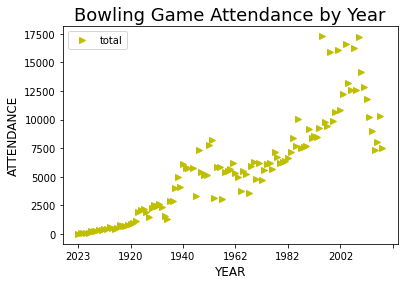

In [24]:
df.plot(x='year',y='total', style='y>')
x=plt.xlabel('YEAR', fontsize=12)
plt.ylabel('ATTENDANCE', fontsize=12)
plt.title('Bowling Game Attendance by Year', fontsize=18)